In [18]:
# imports
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import plotly.express as px

In [19]:
mpg = sns.load_dataset("mpg")

In [20]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [21]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<Axes: >

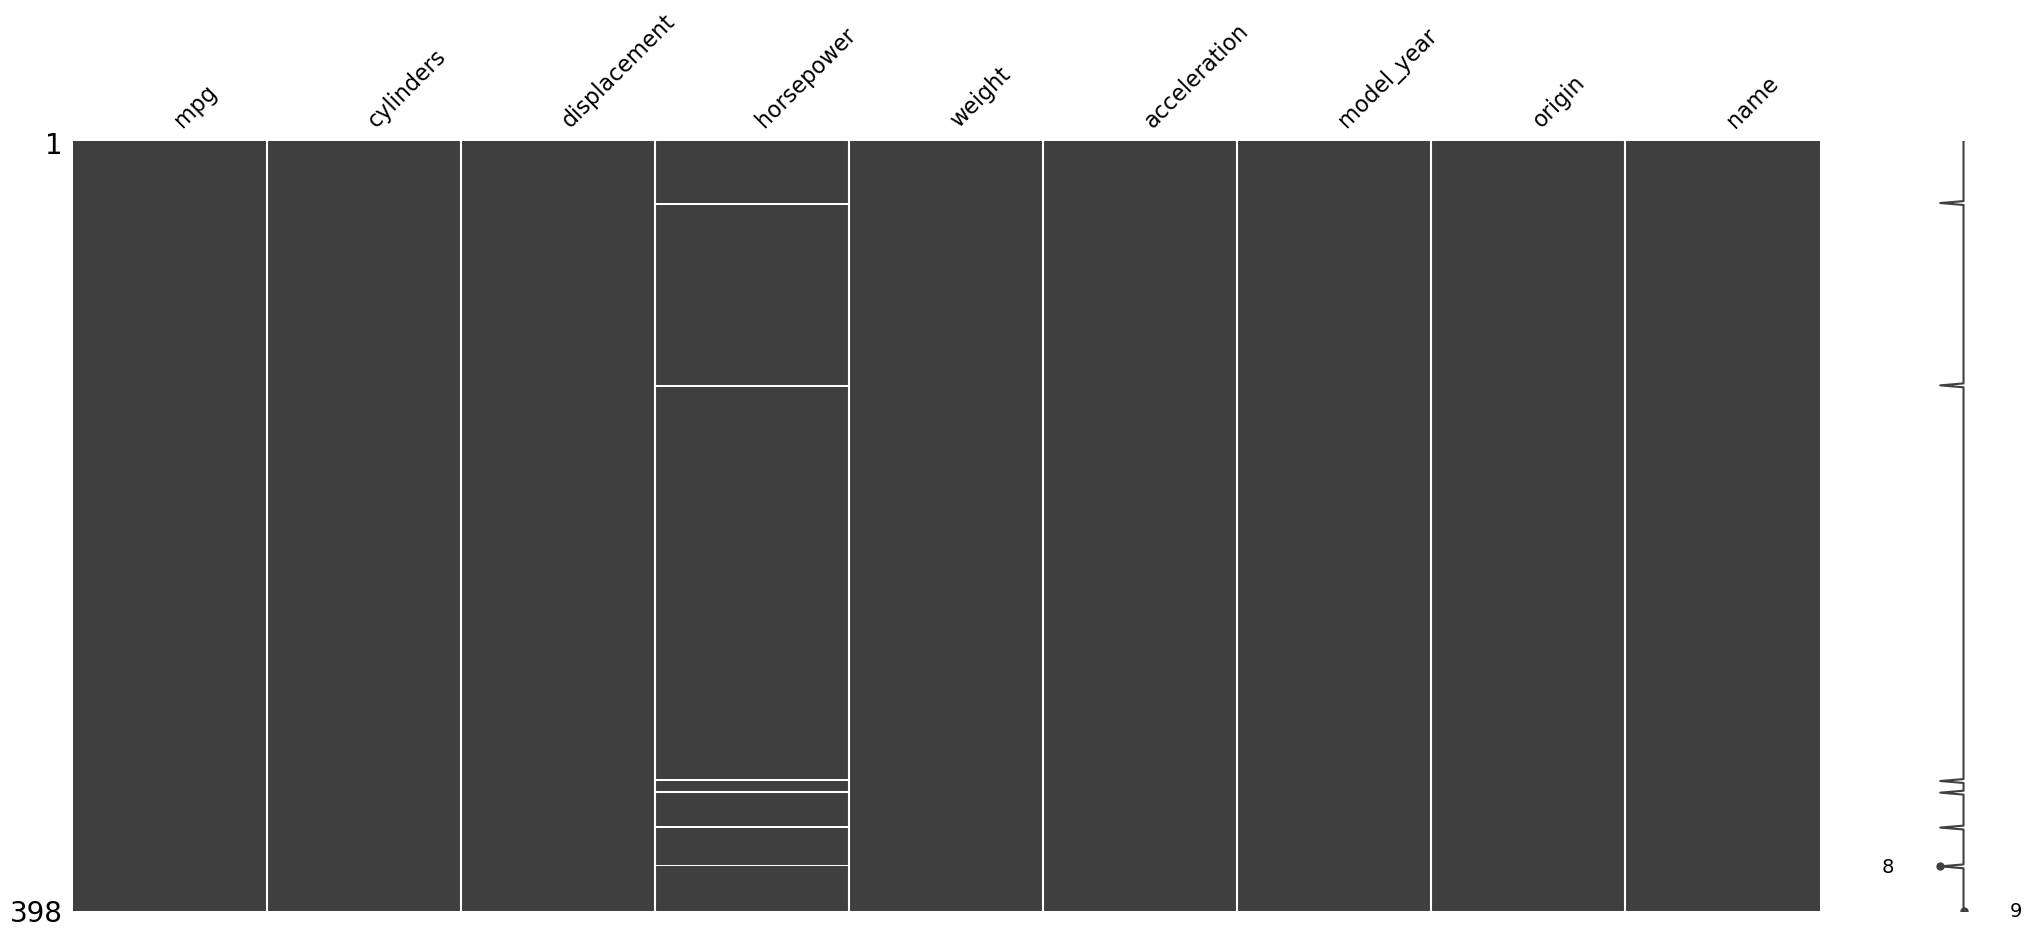

In [22]:
msno.matrix(mpg)

In [23]:
mpg.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [24]:
mpg.loc[mpg.horsepower.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


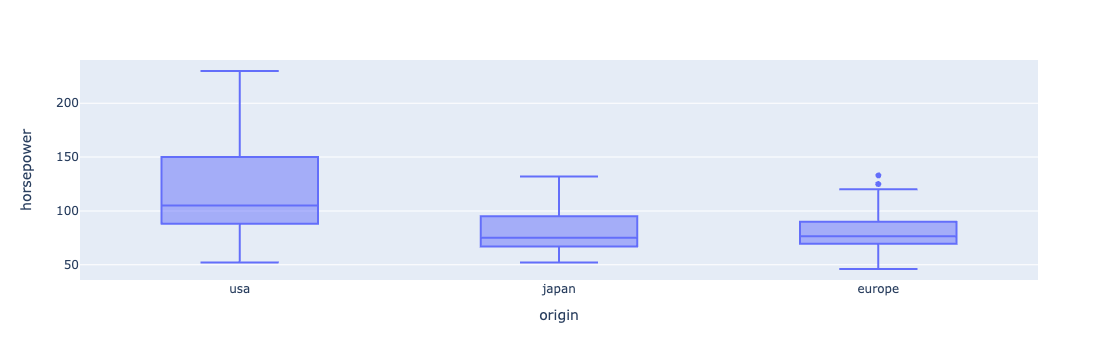

In [13]:
#erste methode ist deletion ---> nicht empohlen
# zweite ist imputation
px.box(mpg, x= "origin", y ="horsepower") # usa ist sehr unterschiedlich, deswegen kein mean option möglich

In [14]:
# imputation ohne fillna methode

mpg.loc[mpg.horsepower.isna(), "horsepower"] = mpg.horsepower.mean()

In [15]:
mpg.loc[mpg.name == "ford pinto"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,104.469388,2046,19.0,71,usa,ford pinto
112,19.0,4,122.0,85.000000,2310,18.5,73,usa,ford pinto
130,26.0,4,122.0,80.000000,2451,16.5,74,usa,ford pinto
168,23.0,4,140.0,83.000000,2639,17.0,75,usa,ford pinto
174,18.0,6,171.0,97.000000,2984,14.5,75,usa,ford pinto
206,26.5,4,140.0,72.000000,2565,13.6,76,usa,ford pinto


In [25]:
#Imputation mit dem Mittelwert gruppiert nach der Klasse --> bessere Methode, da Autos je nach Origin unterschiedliche horsepower haben
mpg.horsepower = mpg.horsepower.fillna(mpg.groupby('origin')["horsepower"].transform('mean'))

In [26]:
mpg.loc[mpg.name == "ford pinto"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,119.04898,2046,19.0,71,usa,ford pinto
112,19.0,4,122.0,85.00000,2310,18.5,73,usa,ford pinto
130,26.0,4,122.0,80.00000,2451,16.5,74,usa,ford pinto
168,23.0,4,140.0,83.00000,2639,17.0,75,usa,ford pinto
174,18.0,6,171.0,97.00000,2984,14.5,75,usa,ford pinto
206,26.5,4,140.0,72.00000,2565,13.6,76,usa,ford pinto


In [29]:
mpg = pd.read_csv('../DataScienceDatasets/mpg.csv')
#Fehlwerte generieren
mask = mpg.sample(range(1, len(mpg)), 10)
mpg.weight.iloc[mask] = np.nan

NameError: name 'random' is not defined